In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

category
1    371629
3    134837
2      9461
Name: count, dtype: int64


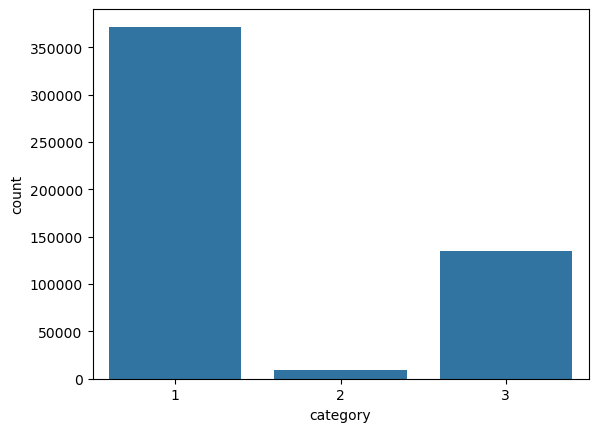

              product                                          complaint  \
1019  Debt collection  RE : Attentively review my formal writ compose...   
1383  Debt collection  This complaint is against S & S Recovery , Inc...   
1724  Debt collection  It stated that I owe a balance of {$720.00}. I...   
1788  Debt collection  I hired XXXX XXXX XXXX to negotiate with my cr...   
1859  Debt collection  SPS Select Portfolio Servicing of XXXX XXXX XX...   

      category  
1019         1  
1383         1  
1724         1  
1788         1  
1859         1  


In [5]:
# Load dataset
df = pd.read_csv('complaints.csv')

# Keep relevant columns and remove missing values
df = df[['Product', 'Consumer complaint narrative']].dropna()
df.columns = ['product', 'complaint']

# Map products to 4 categories
category_mapping = {
    'Credit reporting, credit repair services, or other': 0,
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}
df['category'] = df['product'].map(category_mapping)
df = df.dropna()  # remove rows not in mapping
df['category'] = df['category'].astype(int)

# Quick EDA
print(df['category'].value_counts())
sns.countplot(x='category', data=df)
plt.show()

print(df.head())

In [7]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove punctuation
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]  # remove stopwords
    return " ".join(tokens)

df['cleaned_complaint'] = df['complaint'].apply(clean_text)

In [9]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_complaint'])
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

Naive Bayes Accuracy: 0.9510
Logistic Regression Accuracy: 0.9697
Random Forest Accuracy: 0.9642


              precision    recall  f1-score   support

           1       0.98      0.99      0.98     74510
           2       0.79      0.52      0.62      1933
           3       0.96      0.96      0.96     26743

    accuracy                           0.97    103186
   macro avg       0.91      0.82      0.85    103186
weighted avg       0.97      0.97      0.97    103186



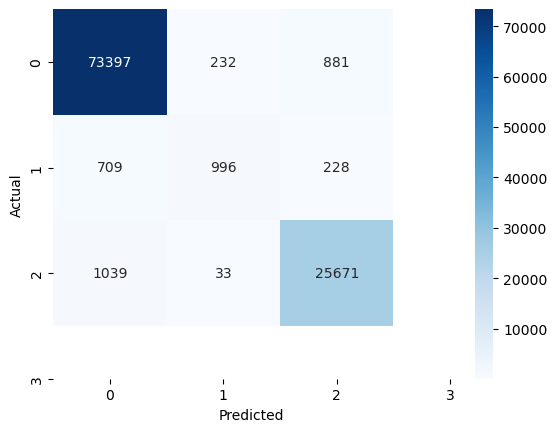

In [ ]:
# Classification report and confusion matrix for best model
best_model = LogisticRegression(max_iter=200)  # replace with best-performing
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
def predict_complaint(text):
    text = clean_text(text)
    vec = tfidf.transform([text])
    pred = best_model.predict(vec)[0]
    return pred

# Example prediction
sample_text = "I am unable to get my credit report updated."
print("Predicted Category:", predict_complaint(sample_text))

Predicted Category: 1
